# TRPO Hyperparameters

Running TRPO algorithm on "CartPole-v0" environment with different hyperparemeters.

In [19]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [185]:
def get_results(config_dir, results_dir, col='EpRewMean', max_iter=50):
    """Creates pandas dataframe from csv files with results."""
    results = pd.DataFrame()
    
    for filename in sorted(os.listdir(config_dir)):
        
        with open(os.path.join(config_dir, filename), "r") as f:
            params = json.load(f)
        
        name = '-'.join([str(key) + '=' + str(val)for key, val in params.items()])
        
        progress_file = os.path.join(results_dir, os.path.splitext(filename)[0], 'progress.csv')
        
        df = pd.read_csv(progress_file, usecols=[col])
        results[name] = df[col][:max_iter]
    results['Iteration'] = results.index
    return results

In [186]:
def plot_results(data, val="EpRewMean"):
    """Plots the results."""
    data = data.melt('Iteration', var_name='cols', value_name=val).set_index(['cols'])
    g = sns.relplot(
        x="Iteration",
        y=val,
        hue='cols',
        kind="line",
        data=data.reset_index(), aspect=2.5)
    plt.show()

## Gamma

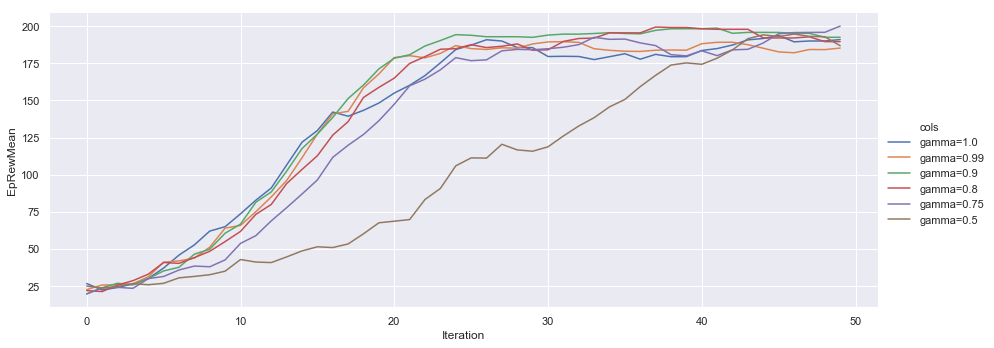

In [187]:
plot_results(get_results('./params/gamma', './results/gamma'))

## Lambda

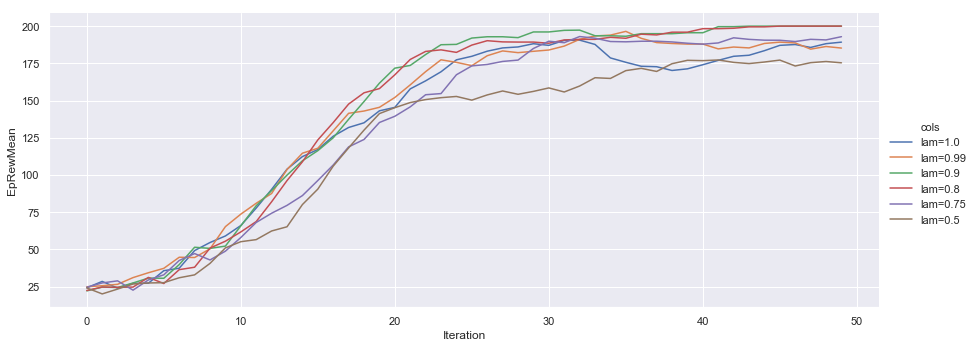

In [188]:
plot_results(get_results('./params/lambda', './results/lambda'))

## Max KL divergence

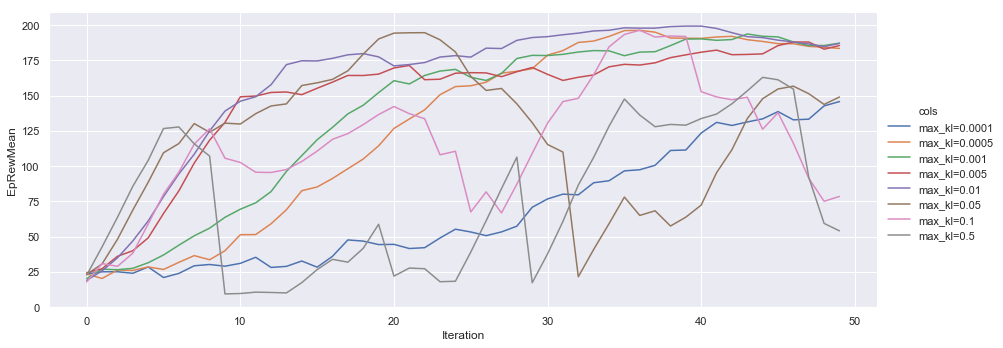

In [189]:
plot_results(get_results('./params/kl_divergence', './results/kl_divergence'))

## VF optimizer

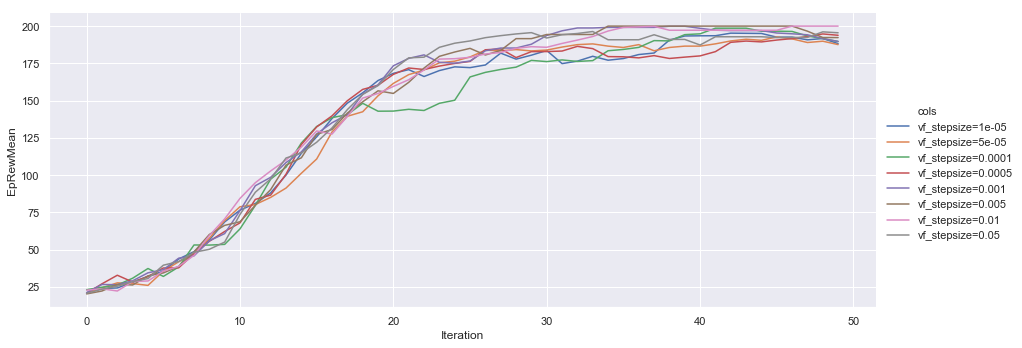

In [190]:
plot_results(get_results('./params/vf_stepsize', './results/vf_stepsize'))

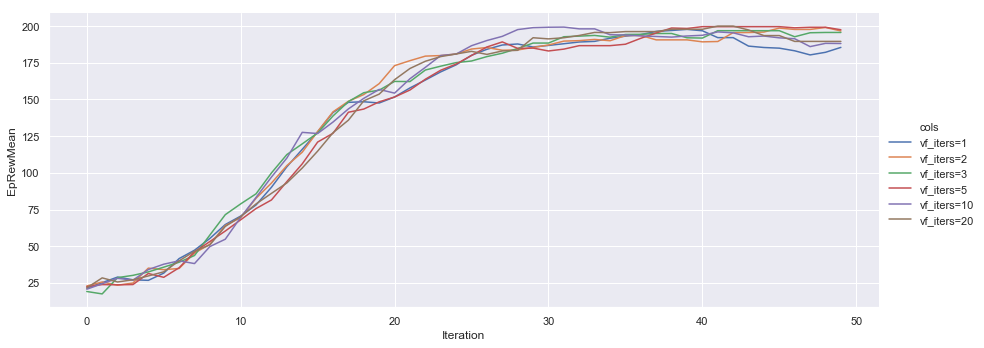

In [191]:
plot_results(get_results('./params/vf_iters', './results/vf_iters'))

## Entropy Coefficient

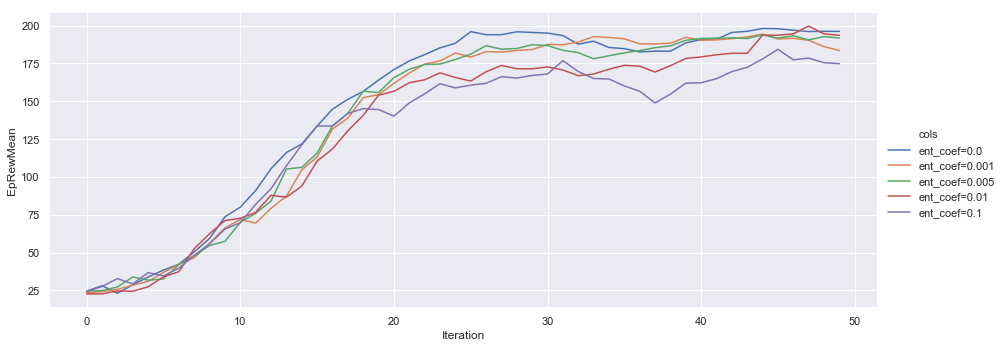

In [192]:
plot_results(get_results('./params/ent_coef', './results/ent_coef'))